# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [2]:
from utils import get_dataset
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import numpy as np
import tensorflow as tf
%matplotlib inline

/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.17.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
dataset = get_dataset("/app/project/data/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/app/project/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/app/project/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 71
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [4]:
def display_regions(image, bboxes, classes):
    """
    This function takes a regions and a image from the dataset and display the image with 
    the associated bounding boxes.
    """
    
    # pre-defined color-code
    # Unknown: white
    # Vehicle: red
    # Pedestrian: blue
    # Sign: yellow
    # Cyclist: green
    color_code = [ 'w', 'r', 'b', 'y', 'g' ]
    
    w, h, _ = image.shape
    # resize the bboxes
    bboxes[:, [0, 2]] *= w
    bboxes[:, [1, 3]] *= h
    
    f, ax = plt.subplots(1, figsize=(5, 5))
    ax.imshow(np.squeeze(image))#image.astype(np.uint8))
    for bb, cl in zip(bboxes, classes):
        y1, x1, y2, x2 = bb
        rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor=color_code[cl], linewidth=2)
        ax.add_patch(rec)
    plt.show()

def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    # get images, bboxes and classes
    batched_images = batch['image'].numpy()
    batched_bboxes = batch['groundtruth_boxes'].numpy()
    batched_classes = batch['groundtruth_classes'].numpy()
    batch_size = batched_images.shape[0]
    for idx in range(batch_size):
        display_regions(batched_images[idx, ...], 
                          batched_bboxes[idx, ...],
                          batched_classes[idx, ...])

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

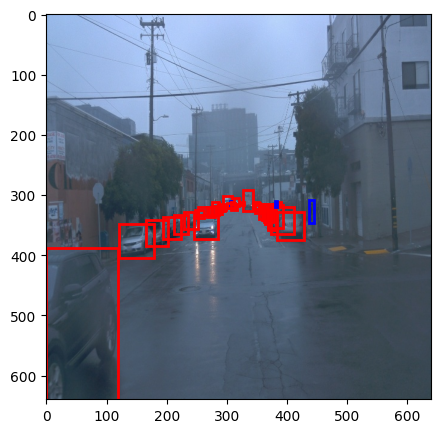

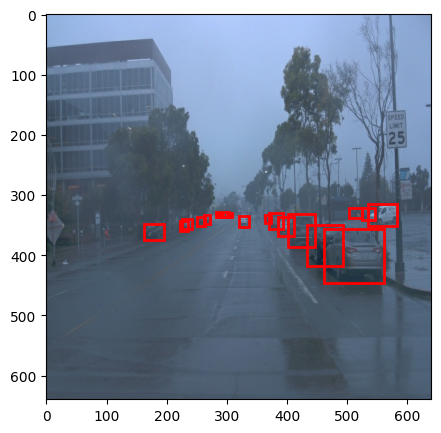

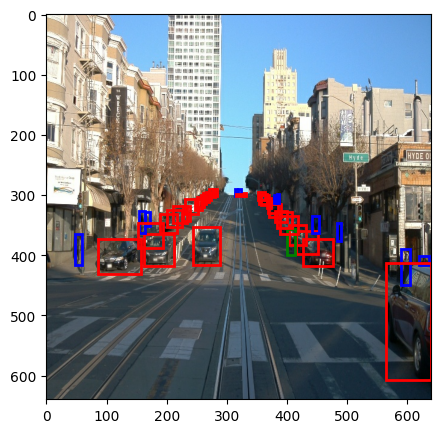

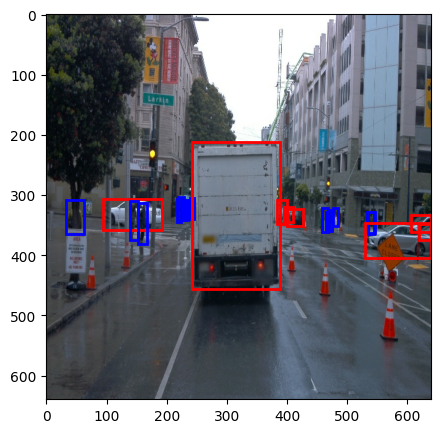

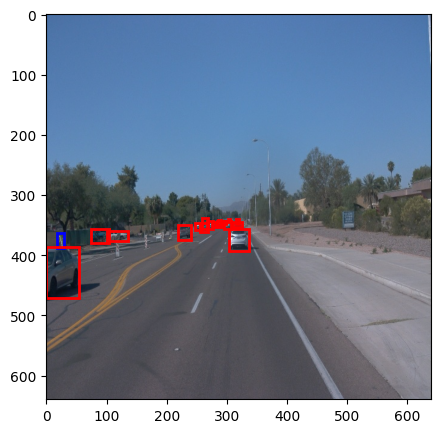

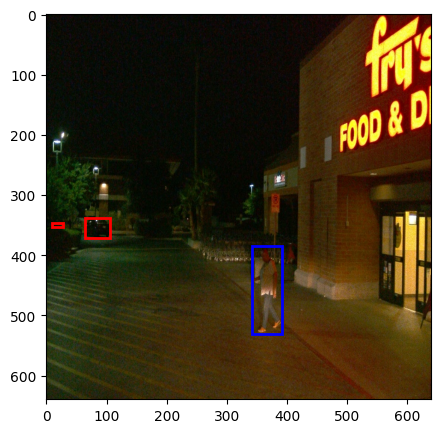

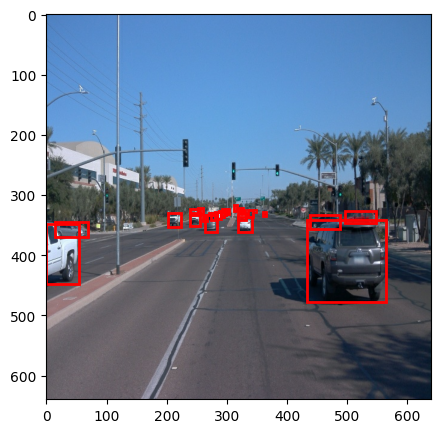

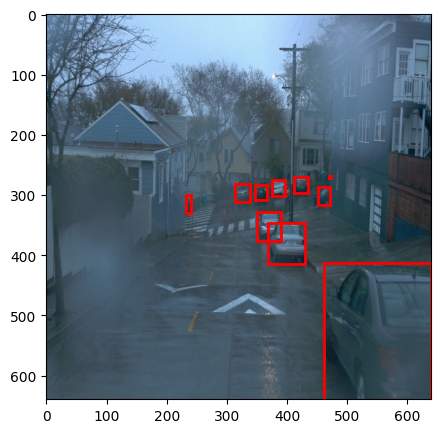

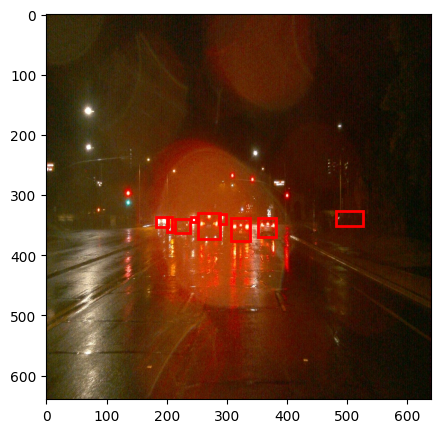

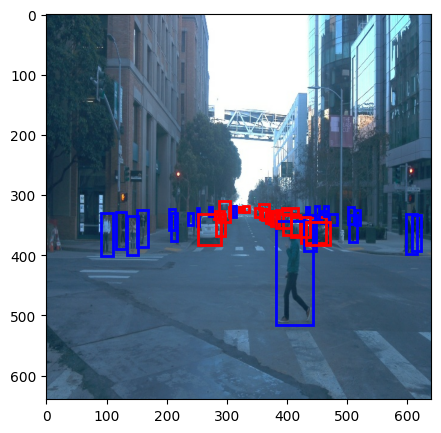

In [5]:
# Display 10 random images in dataset
for batch in dataset.shuffle(buffer_size=100).batch(1).take(10):
    display_instances(batch)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

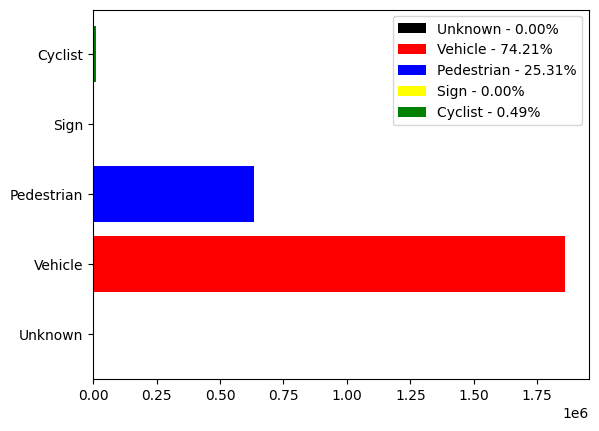

In [69]:
# Draw pie chart for label distribution
class_names = ['Unknown', 'Vehicle', 'Pedestrian', 'Sign', 'Cyclist']
class_colors = ['black', 'red', 'blue', 'yellow', 'green']
class_count = [0 for x in range(len(class_names))]

# Count the label distribution
dataset.shuffle(100)
b_size = 100000
data = dataset.take(b_size)

for batch in data:
    classes = batch['groundtruth_classes'].numpy()
    for class_idx in classes:
        class_count[class_idx] += 1

# Draw bar graph
handles = plt.barh(y=range(len(class_names)), width=class_count, color=class_colors)
plt.yticks(ticks=range(len(class_names)), labels=class_names)

total_count = sum(class_count)
legend_labels=[f"{name} - {count/float(total_count)*100:.2f}%" for name, count in zip(class_names, class_count)]
plt.legend(handles=handles, labels=legend_labels)

plt.show()
